## Importing The Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os


In [2]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [3]:
def load_data(filepath):
    data = pd.read_csv(filepath, on_bad_lines='skip')
    print(f"Successfully loaded {filepath}")
    return data


US_comments = load_data('GBcomments.csv')
US_videos = load_data('GBvideos.csv')


Successfully loaded GBcomments.csv
Successfully loaded GBvideos.csv


## Analysis and Data Cleaning on both the datasets.

In [4]:
US_videos.shape

(7993, 11)

In [5]:
US_videos.nunique()

video_id          1736
title             1771
channel_title     1003
category_id         15
tags              1631
views             7957
likes             6841
dislikes          2350
comment_total     4084
thumbnail_link    1736
date                40
dtype: int64

In [6]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7993 non-null   object 
 1   title           7993 non-null   object 
 2   channel_title   7993 non-null   object 
 3   category_id     7993 non-null   int64  
 4   tags            7993 non-null   object 
 5   views           7993 non-null   int64  
 6   likes           7993 non-null   int64  
 7   dislikes        7993 non-null   int64  
 8   comment_total   7993 non-null   int64  
 9   thumbnail_link  7993 non-null   object 
 10  date            7993 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 687.0+ KB


In [7]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


In [8]:
US_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [9]:
US_comments.shape

(718452, 4)

In [10]:
US_comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
US_comments.dropna(inplace=True)

In [12]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [13]:
US_comments.shape

(718424, 4)

In [14]:
US_comments.nunique()

video_id          1692
comment_text    372844
likes             1134
replies            349
dtype: int64

In [15]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718424 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718424 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718424 non-null  int64 
 3   replies       718424 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 27.4+ MB


In [16]:
US_comments.drop(41587, inplace=True)

In [17]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [18]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [19]:
US_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


## Removing Punctuations, Numbers and Special Characters.

In [20]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words.

In [21]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case.

In [22]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

## Tokenization

In [23]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [it's, more, accurate, call, (1000), because, ...
1                   [there, with, samsung, phone\n😂😂😂]
2    [thank, gosh,, place, watch, without, having, ...
3    [what, happened, home, button, iphone, *****co...
4    [power, disease., care, cure., keep, caring, y...
Name: comment_text, dtype: object

## Lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [25]:
wnl = WordNetLemmatizer()

In [26]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0    [it's, more, accurate, call, (1000), because, ...
1                   [there, with, samsung, phone\n😂😂😂]
2    [thank, gosh,, place, watch, without, having, ...
3    [what, happened, home, button, iphone, *****co...
4    [power, disease., care, cure., keep, caring, y...
Name: comment_text, dtype: object

In [27]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [28]:
US_comments['comment_text'] = tokenized_tweet

## Sentiment Analysis on the US Comments Dataset

In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [31]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [32]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,jt2OHQh0HoQ,it's more accurate call (1000) because price c...,0,0,0.0000
1,jt2OHQh0HoQ,there with samsung phone\n😂😂😂,1,0,0.0000
2,jt2OHQh0HoQ,"thank gosh, place watch without having hd... s...",0,0,0.6369
3,jt2OHQh0HoQ,what happened home button iphone *****cough***...,0,0,0.0000
4,jt2OHQh0HoQ,power disease. care cure. keep caring yourself...,0,0,0.8910


## Classifying the Sentiment scores

In [33]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [34]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,jt2OHQh0HoQ,it's more accurate call (1000) because price c...,0,0,0.0000,Neutral
1,jt2OHQh0HoQ,there with samsung phone\n😂😂😂,1,0,0.0000,Neutral
2,jt2OHQh0HoQ,"thank gosh, place watch without having hd... s...",0,0,0.6369,Positive
3,jt2OHQh0HoQ,what happened home button iphone *****cough***...,0,0,0.0000,Neutral
4,jt2OHQh0HoQ,power disease. care cure. keep caring yourself...,0,0,0.8910,Positive


In [35]:
US_comments.Sentiment.value_counts()

Sentiment
Positive    324678
Neutral     274883
Negative    118862
Name: count, dtype: int64

## Calculating the percentage of comments which are positive

In [36]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages.

In [37]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [38]:
Positivity.columns = ['video_id','Positive Percentage']

In [39]:
Positivity.head()

,video_id,Positive Percentage
0,jt2OHQh0HoQ,26.25
1,YPVcg45W0z4,43.52
2,T_PuZBdT2iM,28.38
3,NsjsmgmbCfc,52.84
4,zZ2CLmvqfXg,46.57


In [40]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [41]:
Positivity['Channel'] = channels

In [42]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,jt2OHQh0HoQ,26.25,Apple Event
1,YPVcg45W0z4,43.52,emmablackery
2,T_PuZBdT2iM,28.38,ProZD
3,NsjsmgmbCfc,52.84,Sprinkleofglitter
4,zZ2CLmvqfXg,46.57,Rio Ferdinand Presents FIVE


## Wordcloud of all the comments

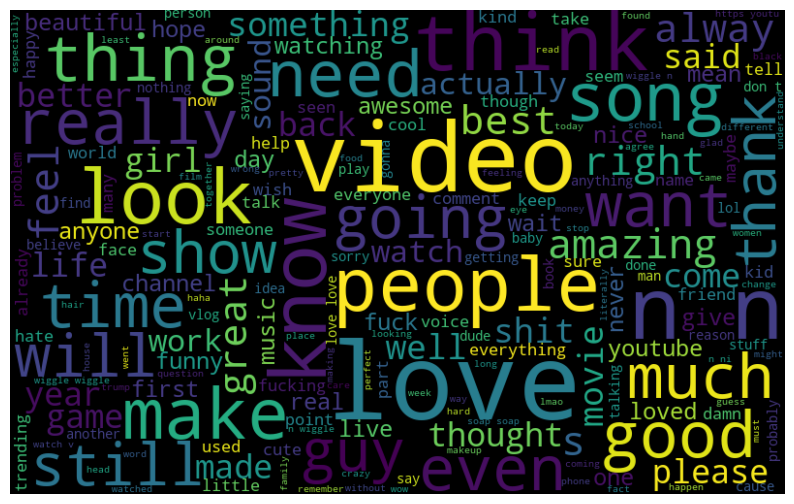

In [43]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Positive Comments

In [44]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

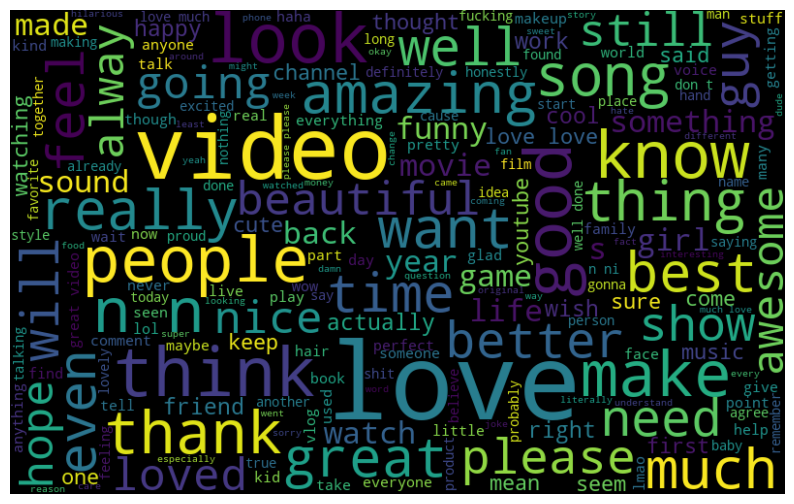

In [45]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Negative Comments

In [46]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

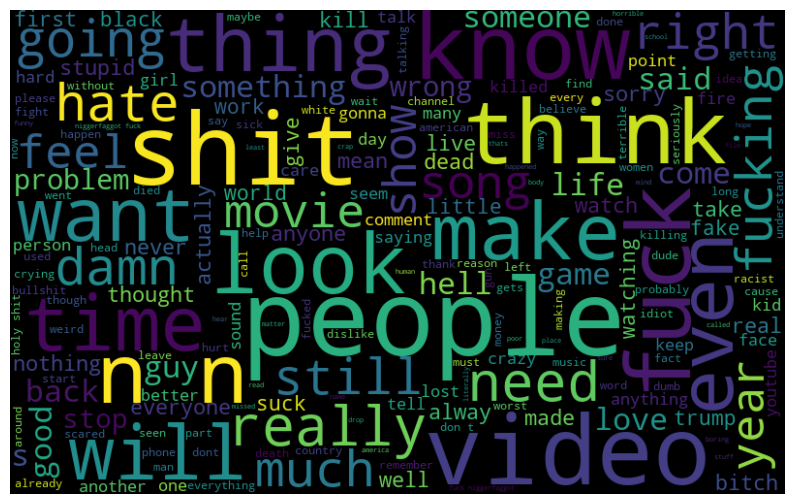

In [47]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud of Neutral Comments.

In [48]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

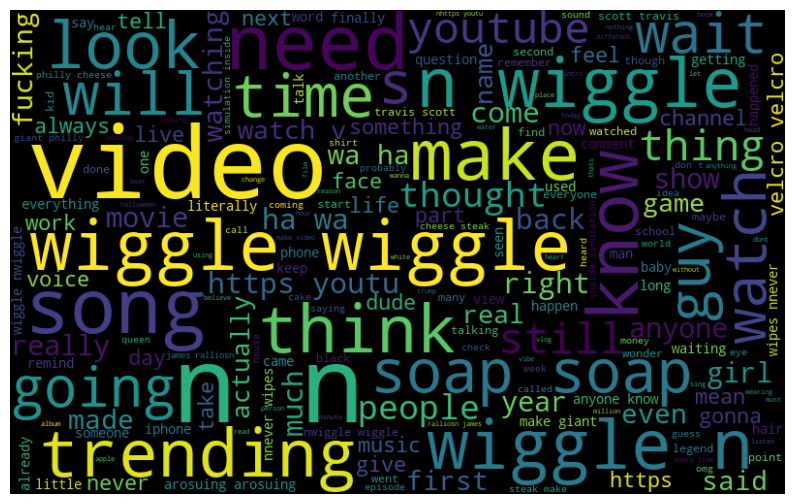

In [49]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

In [52]:
# Splitting each lemmatized comment back into a list of words
words = US_comments['comment_text'].str.split(expand=True).stack()

# Finding unique words and counting them
unique_words_count = words.nunique()

print(f"Total number of unique words after lemmatization: {unique_words_count}")


Total number of unique words after lemmatization: 324655
